## Exercici 1
Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0)

In [471]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_flights = pd.read_csv("DelayedFlights.csv")
display(df_flights.head(25))
df_flights = df_flights.sample(5000, random_state = 27) # Sample muy pequeña para poder ejecutar sin que consuma mucho tiempo

# Utilizar solo datos numéricos
flights_int = df_flights.loc[:,(df_flights.dtypes=='int').values]
flights_float = df_flights.loc[:,(df_flights.dtypes=='float').values]
df_flights = pd.concat([flights_int, flights_float], axis=1)

df_flights.drop(columns = 'Unnamed: 0', inplace=True) # Esta columna es como un Id, así que no la necesitamos. 
# Conservo FlightNum porque la asignación de números de vuelo suele hacerse en función de información sobre el trayecto

count_nan_in_df = df_flights.isnull().sum()
print(count_nan_in_df)
print(df_flights.info())

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
5,6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,...,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
6,10,2008,1,3,4,706.0,700,916.0,915,WN,...,5.0,19.0,0,N,0,NaN,NaN,NaN,NaN,NaN
7,11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,...,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
8,15,2008,1,3,4,1029.0,1020,1021.0,1010,WN,...,6.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
9,16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,...,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0


Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
CRSDepTime              0
CRSArrTime              0
Distance                0
Cancelled               0
Diverted                0
DepTime                 0
ArrTime                20
ActualElapsedTime      22
CRSElapsedTime          0
AirTime                22
ArrDelay               22
DepDelay                0
TaxiIn                 20
TaxiOut                 1
CarrierDelay         1780
WeatherDelay         1780
NASDelay             1780
SecurityDelay        1780
LateAircraftDelay    1780
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 69342 to 1584859
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5000 non-null   int64  
 1   Month              5000 non-null   int64  
 2   DayofMonth         5000 non-null   int64  
 3   DayOfWeek          5000 non-nu

Al comprobar la existencia de valores nulos por columna, me llamó especialmente la atención que hubiera tres instancias de ArrTime. Esto quiere decir que hay vuelos sin hora de llegada. Para investigar acerca la causa de esta falta de información, visualicé las filas con ArrTime nulo. 

In [472]:
df_nan = df_flights.copy()
df_nan = df_nan.loc[df_flights['ArrTime'].isna() == True]
display(df_nan)
#Elimnar algunas columnas del df para poder verlas todas
df_nan.drop(columns = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], inplace=True)
df_nan = df_nan.loc[df_flights['ArrTime'].isna() == True]
display(df_nan)

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,Distance,Cancelled,Diverted,DepTime,...,AirTime,ArrDelay,DepDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1765012,2008,12,26,5,1500,1620,423,0,1,1726.0,...,NaN,NaN,146.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN
1864381,2008,12,21,7,850,1245,2603,1,0,1518.0,...,NaN,NaN,388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1493520,2008,9,21,7,615,630,296,0,1,730.0,...,NaN,NaN,75.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN
37854,2008,1,31,4,600,808,643,0,1,633.0,...,NaN,NaN,33.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN
494235,2008,3,15,6,1401,1550,547,0,1,1433.0,...,NaN,NaN,32.0,NaN,27.0,NaN,NaN,NaN,NaN,NaN
846900,2008,5,21,3,1525,2025,1231,0,1,1551.0,...,NaN,NaN,26.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN
1250204,2008,7,30,3,1859,2354,1417,0,1,1907.0,...,NaN,NaN,8.0,NaN,25.0,NaN,NaN,NaN,NaN,NaN
1248242,2008,7,27,7,552,559,2421,0,1,709.0,...,NaN,NaN,77.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN
1154852,2008,7,23,3,1548,1909,733,0,1,1749.0,...,NaN,NaN,121.0,NaN,45.0,NaN,NaN,NaN,NaN,NaN
1278607,2008,8,14,4,1820,1835,833,0,1,1850.0,...,NaN,NaN,30.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN


,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,Distance,Cancelled,Diverted,DepTime,ArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,TaxiIn,TaxiOut
1765012,2008,12,26,5,1500,1620,423,0,1,1726.0,NaN,NaN,80.0,NaN,NaN,7.0
1864381,2008,12,21,7,850,1245,2603,1,0,1518.0,NaN,NaN,355.0,NaN,NaN,NaN
1493520,2008,9,21,7,615,630,296,0,1,730.0,NaN,NaN,75.0,NaN,NaN,21.0
37854,2008,1,31,4,600,808,643,0,1,633.0,NaN,NaN,128.0,NaN,NaN,10.0
494235,2008,3,15,6,1401,1550,547,0,1,1433.0,NaN,NaN,109.0,NaN,NaN,27.0
846900,2008,5,21,3,1525,2025,1231,0,1,1551.0,NaN,NaN,180.0,NaN,NaN,15.0
1250204,2008,7,30,3,1859,2354,1417,0,1,1907.0,NaN,NaN,235.0,NaN,NaN,25.0
1248242,2008,7,27,7,552,559,2421,0,1,709.0,NaN,NaN,314.0,NaN,NaN,10.0
1154852,2008,7,23,3,1548,1909,733,0,1,1749.0,NaN,NaN,141.0,NaN,NaN,45.0
1278607,2008,8,14,4,1820,1835,833,0,1,1850.0,NaN,NaN,135.0,NaN,NaN,6.0


Las filas con ArrTime nulo se corresponden con vuelos Cancelled o Diverted (cancelados o desviados). Por tanto, se trata de vuelos que nunca llegaron a producirse. Sin embargo, todos ellos cuentan con un valores para DepDelay (retraso en la salida).

Después, decidí comprobar si todos los vuelos cancelados o desviados se correspondían con aquellos que no tenían hora de llegada (ArrTime como Nan).

In [473]:
df_diverted = df_flights.loc[df_flights['Diverted'] > 0]
display(df_diverted)

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,Distance,Cancelled,Diverted,DepTime,...,AirTime,ArrDelay,DepDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1765012,2008,12,26,5,1500,1620,423,0,1,1726.0,...,NaN,NaN,146.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN
1493520,2008,9,21,7,615,630,296,0,1,730.0,...,NaN,NaN,75.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN
37854,2008,1,31,4,600,808,643,0,1,633.0,...,NaN,NaN,33.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN
494235,2008,3,15,6,1401,1550,547,0,1,1433.0,...,NaN,NaN,32.0,NaN,27.0,NaN,NaN,NaN,NaN,NaN
846900,2008,5,21,3,1525,2025,1231,0,1,1551.0,...,NaN,NaN,26.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN
1250204,2008,7,30,3,1859,2354,1417,0,1,1907.0,...,NaN,NaN,8.0,NaN,25.0,NaN,NaN,NaN,NaN,NaN
1248242,2008,7,27,7,552,559,2421,0,1,709.0,...,NaN,NaN,77.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN
1154852,2008,7,23,3,1548,1909,733,0,1,1749.0,...,NaN,NaN,121.0,NaN,45.0,NaN,NaN,NaN,NaN,NaN
1278607,2008,8,14,4,1820,1835,833,0,1,1850.0,...,NaN,NaN,30.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN
1780066,2008,12,9,2,1605,1722,351,0,1,1906.0,...,NaN,NaN,181.0,5.0,49.0,NaN,NaN,NaN,NaN,NaN


In [474]:
df_diverted = df_flights.loc[df_flights['Cancelled'] > 0]
display(df_diverted)

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,Distance,Cancelled,Diverted,DepTime,...,AirTime,ArrDelay,DepDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1864381,2008,12,21,7,850,1245,2603,1,0,1518.0,...,NaN,NaN,388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Efectivamente, los vuelos cancelados o desviados son los mismos sin hora de llegada.

Es necesario sustituir los valores Nan para que el modelo de aprendizaje pueda procesarlos. Sin embargo, los valores nulos de ArrTime se corresponden con horas de llegada, por lo que no tiene sentido inferirlo. No es información que falte, sino que nunca existió.

Ante esta situación, consideré eliminar las filas con ArrTime nulo. Se trata de vuelos que nunca se han producido, y que, por tanto, no pueden estar retrasados ni no retrasados. Como estos vuelos han sido anulados y no llegaron a existir, no tiene sentido que el modelo utilice esta información para predecir retrasos.

Además, en el caso de que decidiera incluir esta información en el modelo, ¿cómo podría sustituir los valores nulos de ArrTime para que fueran procesados? Tendría que inferir esta información de alguna manera (quizás equiparando la hora de salida a la hora de llegada), que en cualquier caso resultaría totalmente falsa.

In [475]:
df_flights = df_flights.dropna(subset=['ArrTime'])
count_nan_in_df = df_flights.isnull().sum()
print (count_nan_in_df)

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
CRSDepTime              0
CRSArrTime              0
Distance                0
Cancelled               0
Diverted                0
DepTime                 0
ArrTime                 0
ActualElapsedTime       2
CRSElapsedTime          0
AirTime                 2
ArrDelay                2
DepDelay                0
TaxiIn                  0
TaxiOut                 0
CarrierDelay         1760
WeatherDelay         1760
NASDelay             1760
SecurityDelay        1760
LateAircraftDelay    1760
dtype: int64


En las columnas correspondientes a los retrasos, el hecho de que el valor sea nulo significa que el retraso no se ha producido, por lo tanto, puedo atribuirle 0 minutos.

In [476]:
df_flights = df_flights.fillna(0)
count_nan_in_df = df_flights.isnull().sum()
print (count_nan_in_df)

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
CRSDepTime           0
CRSArrTime           0
Distance             0
Cancelled            0
Diverted             0
DepTime              0
ArrTime              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
TaxiIn               0
TaxiOut              0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64


Para que la información relativa a horas fuera más adecuada, decidí sustituir DepTime, ArrTime, CRSDepTime y CRSArrTime por nuevas columnas para tratar por separado la hora y los minutos.

In [477]:
df_flights['DepTime'] = df_flights['DepTime'].astype(int)
df_flights['DepTime'] = df_flights['DepTime'].astype(str)
df_flights['DepTime'] = df_flights['DepTime'].str.zfill(4)
df_flights['DepTimeHour'] = pd.to_datetime(df_flights['DepTime'], format='%H%M').dt.hour
df_flights['DepTimeMinutes'] = pd.to_datetime(df_flights['DepTime'], format='%H%M').dt.minute
df_flights.drop(columns = 'DepTime', inplace=True)


df_flights['ArrTime'] = df_flights['ArrTime'].astype(int)
df_flights['ArrTime'] = df_flights['ArrTime'].astype(str)
df_flights['ArrTime'] = df_flights['ArrTime'].str.zfill(4)

"""
Bucle para unificar el formato de las horas de medianoche. 
El formato que admite datetime es 00.
Al ejecutar, esta es la única columna generaba errores porque la medianoche se configuraba como 00 y 24.
Si se utilizara una muestra de datos diferente, es posible que hubiera que aplicar este bucle a otras columnas.
"""
for value in df_flights['ArrTime']:
    if value[:2] == '24':
        value_new = '00' + value[2:]
        df_flights['ArrTime'] = df_flights['ArrTime'].replace(value, value_new)
        
df_flights['ArrTimeHour'] = pd.to_datetime(df_flights['ArrTime'], format='%H%M').dt.hour
df_flights['ArrTimeMinutes'] = pd.to_datetime(df_flights['ArrTime'], format='%H%M').dt.minute
df_flights.drop(columns = 'ArrTime', inplace=True)


df_flights['CRSDepTime'] = df_flights['CRSDepTime'].astype(str)
df_flights['CRSDepTime'] = df_flights['CRSDepTime'].str.zfill(4)
df_flights['CRSDepTimeHour'] = pd.to_datetime(df_flights['CRSDepTime'], format='%H%M').dt.hour
df_flights['CRSDepTimeMinutes'] = pd.to_datetime(df_flights['CRSDepTime'], format='%H%M').dt.minute
df_flights.drop(columns = 'CRSDepTime', inplace=True)


df_flights['CRSArrTime'] = df_flights['CRSArrTime'].astype(str)
df_flights['CRSArrTime'] = df_flights['CRSArrTime'].str.zfill(4)
df_flights['CRSArrTimeHour'] = pd.to_datetime(df_flights['CRSArrTime'], format='%H%M').dt.hour
df_flights['CRSArrTimeMinutes'] = pd.to_datetime(df_flights['CRSArrTime'], format='%H%M').dt.minute
df_flights.drop(columns = 'CRSArrTime', inplace=True)
display(df_flights)

,Year,Month,DayofMonth,DayOfWeek,Distance,Cancelled,Diverted,ActualElapsedTime,CRSElapsedTime,AirTime,...,SecurityDelay,LateAircraftDelay,DepTimeHour,DepTimeMinutes,ArrTimeHour,ArrTimeMinutes,CRSDepTimeHour,CRSDepTimeMinutes,CRSArrTimeHour,CRSArrTimeMinutes
69342,2008,1,24,4,846,0,0,117.0,133.0,101.0,...,0.0,170.0,17,43,20,40,14,37,17,50
1691796,2008,11,6,4,425,0,0,74.0,82.0,61.0,...,0.0,0.0,9,52,12,6,9,41,12,3
394595,2008,3,19,3,319,0,0,63.0,65.0,53.0,...,0.0,0.0,11,23,12,26,11,15,12,20
1848099,2008,12,18,4,153,0,0,46.0,57.0,31.0,...,0.0,28.0,17,4,17,50,16,0,16,57
900054,2008,6,16,1,277,0,0,53.0,60.0,42.0,...,0.0,22.0,20,34,22,27,20,5,22,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496717,2008,3,27,4,1075,0,0,194.0,158.0,138.0,...,0.0,41.0,17,9,21,23,16,28,20,6
1515571,2008,9,13,6,1367,0,0,200.0,198.0,185.0,...,0.0,39.0,11,49,16,9,11,10,15,28
88529,2008,1,21,1,386,0,0,75.0,83.0,56.0,...,0.0,27.0,14,25,15,40,13,50,15,13
548535,2008,3,14,5,543,0,0,95.0,98.0,83.0,...,0.0,0.0,8,13,9,48,7,55,9,33


A continuación, procedo a crear una nueva columna en el dataset para clasificar los vuelos en retrasados o no retrasados.

In [478]:
def label_delay(row):
    if row['ArrDelay'] > 0:
        return 1 # Delayed
    else:
        return 0 # Not Delayed

df_flights['ArrDelayLabels'] = df_flights.apply(lambda row: label_delay(row), axis=1)
display(df_flights['ArrDelayLabels'])

print(df_flights.columns)

69342      1
1691796    1
394595     1
1848099    1
900054     1
          ..
496717     1
1515571    1
88529      1
548535     1
1584859    1
Name: ArrDelayLabels, Length: 4980, dtype: int64

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Distance', 'Cancelled',
       'Diverted', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'ArrDelay', 'DepDelay', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'DepTimeHour', 'DepTimeMinutes', 'ArrTimeHour', 'ArrTimeMinutes',
       'CRSDepTimeHour', 'CRSDepTimeMinutes', 'CRSArrTimeHour',
       'CRSArrTimeMinutes', 'ArrDelayLabels'],
      dtype='object')


Creo un dataframe para las features y otro para las labels

In [479]:
df_features = df_flights.copy()
df_features.drop(columns = ['ArrDelay', 'ArrDelayLabels'], inplace=True)
print(df_features.columns)

df_labels = df_flights['ArrDelayLabels']

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Distance', 'Cancelled',
       'Diverted', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'DepDelay', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'DepTimeHour',
       'DepTimeMinutes', 'ArrTimeHour', 'ArrTimeMinutes', 'CRSDepTimeHour',
       'CRSDepTimeMinutes', 'CRSArrTimeHour', 'CRSArrTimeMinutes'],
      dtype='object')


Creo los modelos

In [480]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

logRegr = LogisticRegression(random_state=0)
svm = svm.SVC()
knn = KNeighborsClassifier(n_neighbors=3)
decisionTree = DecisionTreeClassifier(random_state=0)

## Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

**Accuracy**

Es el número de valores clasificados correctamente respecto al total. Puede ser un valor de 0 a 1. Cuanto más cercano a 1, mayor precisión. Sin embargo, esta métrica no es muy útil cuando los valores de las labels no están equilibrados, ya que una precisión alta puede indicar que se está prediciendo el tipo de valor mayoritario.

/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


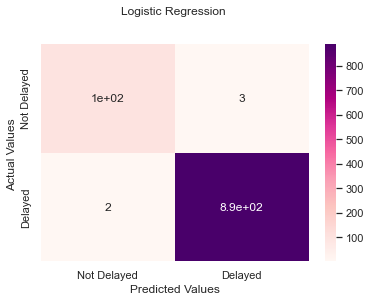

In [481]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

x_train,x_test,y_train,y_test = train_test_split(df_features,df_labels,test_size = 0.2, random_state=0)

logRegr_model = logRegr.fit(x_train, y_train)
y_true = y_test
y_pred = logRegr_model.predict(x_test)
accuracy_logRegr = round(accuracy_score(y_true, y_pred),2)

data_accuracy['Logistic Regression'] = accuracy_logRegr

cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, cmap='RdPu')
ax.set_title('Logistic Regression \n\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['Not Delayed','Delayed'])
ax.yaxis.set_ticklabels(['Not Delayed','Delayed'])
plt.show()


Para Logistic Regression la proporción de TP y TN es muy alta. En comparación, la proporción de FP y FN es prácticamente insignificante. No obstante, se ha de tener en cuenta que también hay muchos más positivos que negativos en el dataset.

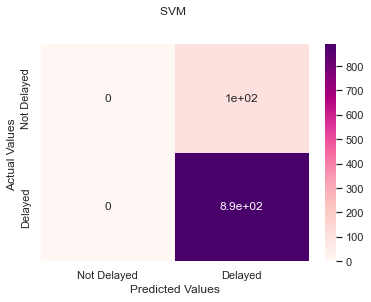

In [482]:
svm_model = svm.fit(x_train, y_train)
y_true = y_test
y_pred = svm_model.predict(x_test)
accuracy_svm = round(accuracy_score(y_true, y_pred),2)

data_accuracy['SVM'] = accuracy_svm

cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, cmap='RdPu')
ax.set_title('SVM \n\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['Not Delayed','Delayed'])
ax.yaxis.set_ticklabels(['Not Delayed','Delayed'])
plt.show()

Para SVM la proporción de TP es muy alta, pero también lo es la de FN. De hecho, este modelo solo predice "Delayed", por lo que no parece muy útil. Esto nos lleva a pensar que sus altas puntuaciones en Accuracy se deben a que la proporción de positivos es muy alta en el dataset.

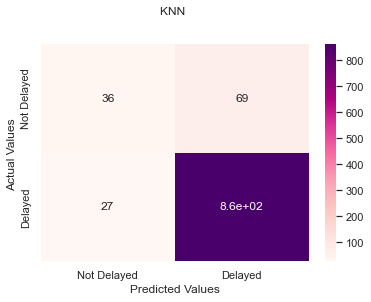

In [483]:
knn_model = knn.fit(x_train, y_train)
y_true = y_test
y_pred = knn_model.predict(x_test)
accuracy_knn = round(accuracy_score(y_true, y_pred),2)

data_accuracy['KNN'] = accuracy_knn

cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, cmap='RdPu')
ax.set_title('KNN \n\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['Not Delayed','Delayed'])
ax.yaxis.set_ticklabels(['Not Delayed','Delayed'])
plt.show()

Para KNN la proporción de TP es muy alta, pero la TN es menor que la de FP. Por tanto, podemos deducir que el modelo tiende a predecir valores positivos.

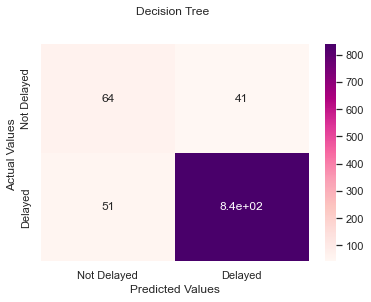

In [484]:
decisionTree_model = decisionTree.fit(x_train, y_train)
y_true = y_test
y_pred = decisionTree_model.predict(x_test)
accuracy_decisionTree = round(accuracy_score(y_true, y_pred),2)

data_accuracy['Decision Tree'] = accuracy_decisionTree

cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, cmap='RdPu')
ax.set_title('Decision Tree \n\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['Not Delayed','Delayed'])
ax.yaxis.set_ticklabels(['Not Delayed','Delayed'])
plt.show()

Para Decision Tree la proporción de TP es muy alta, pero los valores de TN, FP y FN son mucho menores y muy similares. Por tanto, podemos deducir que el modelo tiende a predecir valores positivos.

**Precision**

Es la habilidad del modelo para encontrar todos los valores positivos. La puntuación más favorable es 1 y la menos favorables es 0. Cuanto mayor sea esta métrica, menos falsos positivos habrá.

In [485]:
logRegr_model = logRegr.fit(x_train, y_train)
y_true = y_test
y_pred = logRegr_model.predict(x_test)
precision_logRegr = round(precision_score(y_true, y_pred),2)

data_precision['Logistic Regression'] = precision_logRegr

/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [486]:
svm_model = svm.fit(x_train, y_train)
y_true = y_test
y_pred = svm_model.predict(x_test)
precision_svm = round(precision_score(y_true, y_pred),2)

data_precision['SVM'] = precision_svm

In [487]:
knn_model = knn.fit(x_train, y_train)
y_true = y_test
y_pred = knn_model.predict(x_test)
precision_knn = round(precision_score(y_true, y_pred),2)

data_precision['KNN'] = precision_knn

In [488]:
decisionTree_model = decisionTree.fit(x_train, y_train)
y_true = y_test
y_pred = decisionTree_model.predict(x_test)
precision_decisionTree = round(precision_score(y_true, y_pred),2)

data_precision['Decision Tree'] = precision_decisionTree

**Recall**

Es la habilidad del modelo para encontrar todos los valores positivos. La puntuación más favorable es 1 y la menos favorables es 0. Cuanto mayor sea esta métrica, menos falsos negativos habrá.

In [489]:
logRegr_model = logRegr.fit(x_train, y_train)
y_true = y_test
y_pred = logRegr_model.predict(x_test)
recall_logRegr = round(recall_score(y_true, y_pred),2)

data_recall['Logistic Regression'] = recall_logRegr

/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [490]:
svm_model = svm.fit(x_train, y_train)
y_true = y_test
y_pred = svm_model.predict(x_test)
recall_svm = round(recall_score(y_true, y_pred),2)

data_recall['SVM'] = recall_svm

In [491]:
knn_model = knn.fit(x_train, y_train)
y_true = y_test
y_pred = knn_model.predict(x_test)
recall_knn = round(recall_score(y_true, y_pred),2)

data_recall['KNN'] = recall_knn

In [492]:
decisionTree_model = decisionTree.fit(x_train, y_train)
y_true = y_test
y_pred = decisionTree_model.predict(x_test)
recall_decisionTree = round(recall_score(y_true, y_pred),2)

data_recall['Decision Tree'] = recall_decisionTree

**F1**

Esta métrica es la media armónica Precision y Recall. De la misma forma, la puntuación más favorable es 1 y la menos favorables es 0. Este valor aumenta en la medida que lo hagan Precision y Recall.

In [493]:
logRegr_model = logRegr.fit(x_train, y_train)
y_true = y_test
y_pred = logRegr_model.predict(x_test)
f1_logRegr = round(f1_score(y_true, y_pred),2)

data_f1 = {}
data_f1['Logistic Regression'] = f1_logRegr

/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [494]:
svm_model = svm.fit(x_train, y_train)
y_true = y_test
y_pred = svm_model.predict(x_test)
f1_svm = round(f1_score(y_true, y_pred),2)

data_f1['SVM'] = f1_svm

In [495]:
knn_model = knn.fit(x_train, y_train)
y_true = y_test
y_pred = knn_model.predict(x_test)
f1_knn = round(f1_score(y_true, y_pred),2)

data_f1['KNN'] = f1_knn

In [496]:
decisionTree_model = decisionTree.fit(x_train, y_train)
y_true = y_test
y_pred = decisionTree_model.predict(x_test)
f1_decisionTree = round(f1_score(y_true, y_pred),2)

data_f1['Decision Tree'] = f1_decisionTree

In [497]:
index = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree']
df_metrics = pd.DataFrame({'Accuracy': [data_accuracy['Logistic Regression'], data_accuracy['SVM'], data_accuracy['KNN'], data_accuracy['Decision Tree']],
                          'Precision': [data_precision['Logistic Regression'], data_precision['SVM'], data_precision['KNN'], data_precision['Decision Tree']],
                          'Recall': [data_recall['Logistic Regression'], data_recall['SVM'], data_recall['KNN'], data_recall['Decision Tree']],
                          'F1': [data_f1['Logistic Regression'], data_f1['SVM'], data_f1['KNN'],data_f1['Decision Tree']]},
                  index=index)
display(df_metrics)

,Accuracy,Precision,Recall,F1
Logistic Regression,0.99,1.00,1.00,1.00
SVM,0.89,0.89,1.00,0.94
KNN,0.90,0.93,0.97,0.95
Decision Tree,0.91,0.95,0.94,0.95


Tras comparar las diferentes métricas de los modelos, observamos que todos ellos tienen puntuaciones muy altas. Pese a que las altas puntuaciones en Accuracy no son muy fiables por la naturaleza de la métrica, al calcular Precision, Recall y F1 hemos comprobado que los modelos tienen una gran capacidad predictiva, al obtener puntuaciones muy cercanas a 1.

## Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten.

In [498]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df_features,df_labels,test_size = 0.2, random_state=0)

logRegr_model = logRegr.fit(x_train,y_train)
svm_model = svm.fit(x_train,y_train)
knn_model = knn.fit(x_train,y_train)
decisionTree_model = decisionTree.fit(x_train,y_train)

/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Exercici 4
Compara el seu rendiment utilitzant l’aproximació traint/test o cross-validation.

In [499]:
from sklearn.model_selection import cross_val_score
import numpy as np

data_train_test = {}
data_val_int = {}

logRegr_train_test = logRegr_model.score(x_test, y_test)
logRegr_val_int = cross_val_score(logRegr_model, df_features, df_labels, cv=10)
logRegr_val_int = logRegr_val_int.mean()

data_train_test['Logistic Regression'] = round(logRegr_train_test, 2)
data_val_int['Logistic Regression'] = round(logRegr_val_int, 2)

/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [500]:
svm_train_test = svm_model.score(x_test, y_test)
svm_val_int = cross_val_score(svm_model, df_features, df_labels, cv=10)
svm_val_int = svm_val_int.mean()

data_train_test['SVM'] = round(svm_train_test, 2)
data_val_int['SVM'] = round(svm_val_int, 2)

In [501]:
knn_train_test = knn_model.score(x_test, y_test)
knn_val_int = cross_val_score(knn_model, df_features, df_labels, cv=10)
knn_val_int = knn_val_int.mean()

data_train_test['KNN'] = round(knn_train_test, 2)
data_val_int['KNN'] = round(knn_val_int, 2)

In [502]:
decisionTree_train_test = decisionTree_model.score(x_test, y_test)
decisionTree_val_int = cross_val_score(decisionTree_model, df_features, df_labels, cv=10)
decisionTree_val_int = decisionTree_val_int.mean()

data_train_test['Decision Tree'] = round(decisionTree_train_test, 2)
data_val_int['Decision Tree'] = round(decisionTree_val_int, 2)

In [503]:
df_metrics['Train/Test'] = [data_train_test['Logistic Regression'], data_train_test['SVM'], data_train_test['KNN'], data_train_test['Decision Tree']]
df_metrics['Cross Validation'] = [data_val_int['Logistic Regression'], data_val_int['SVM'], data_val_int['KNN'], data_val_int['Decision Tree']]

display(df_metrics)

,Accuracy,Precision,Recall,F1,Train/Test,Cross Validation
Logistic Regression,0.99,1.00,1.00,1.00,0.99,0.99
SVM,0.89,0.89,1.00,0.94,0.89,0.90
KNN,0.90,0.93,0.97,0.95,0.90,0.90
Decision Tree,0.91,0.95,0.94,0.95,0.91,0.90


He realizado la evaluación del rendimiento a través del cross validation (10-fold). 

He comparado el resultado de esta evaluación para la aproximación train/test y validación interna (en este caso, para comprender los datos, he calculado la media de las 10 puntuaciones).

Para Logistic Regression y Decision Tree las puntuaciones son iguales, y para SVM y KNN varían en 0.01.

## Exercici 5
Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

- RobustScaler para Logistic Regression, KNN
- PCA for KNN
- SMOTE

El hecho de que todos los modelos tiendan a predecir valores positivos en una proporción mucho mayor que los negativos me ha llevado a comprobar si las cantidades de los tipos de etiquetas ('Delayed' y 'Not Delayed') son equivalentes en el dataset. Como puede comprobarse, la muestra está muy desequilibrada.

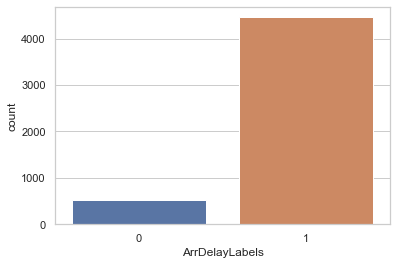

In [505]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="ArrDelayLabels", data=df_flights)
plt.show()

Por otro lado, considero que puedo mejorar la eficiencia de los modelos (y en especial de Logistic Regression, debido a los Warnings que genera Jupyter) estandarizando los datos. Antes de nada, compruebo la existencia de outliers para decidir cómo gestionarlos.

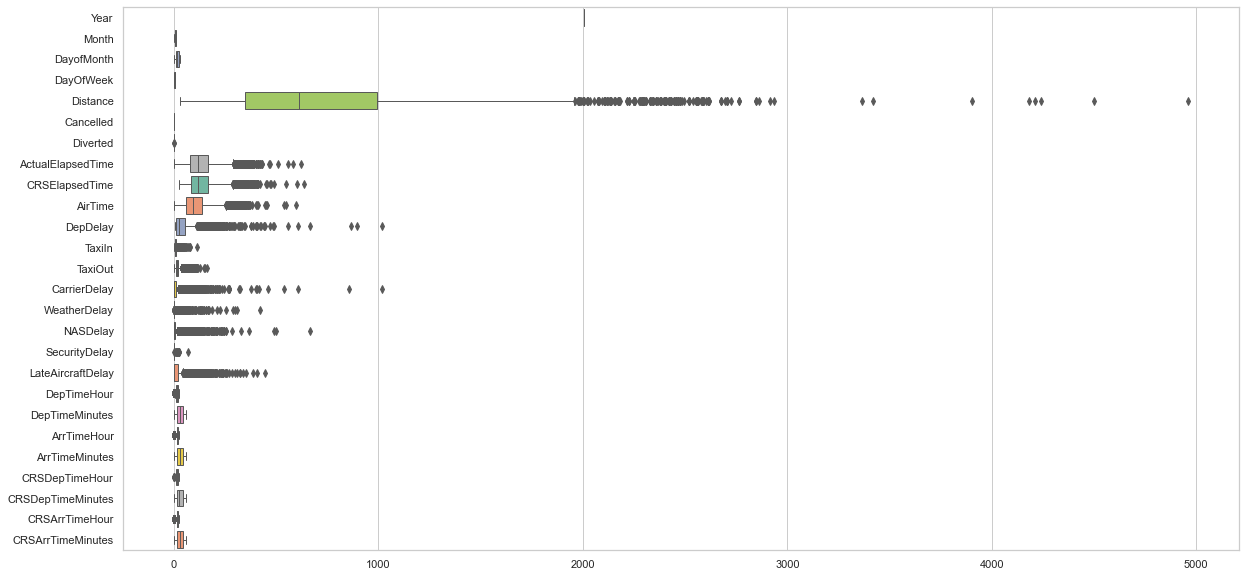

In [504]:
import seaborn as sns
    
ax = sns.boxplot(data=df_features, orient="h", palette="Set2", linewidth=1)
plt.gcf().set_size_inches(20, 10)